<a href="https://colab.research.google.com/github/YunusKhan/NectarineDemo/blob/master/Nectarine101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print (" \\\
Steps Taken \n \\\
1. Tried 2 approaches - Statistical  (file named 101) and Deep Learning ( file names 102_DL) \n \\\
2. Done some data clean up , kept only right wrist position, and actions 1-5  \n \\\
3. Removed column which has position 2 as it was dead weight and did not carry significance  \n \\\
 \n \\\
Linear Regression - very low accuracy of 16  \n \\\
LogisticRegression - even lower accuracy  \n \\\
Decision Tree - 99.6 accuracy  \n \\\
RandomForestRegressor - 99.4 accuracy   \n \\\
 \n \\\
Deep Learning  \n \\\
Tried a Simple Dense Model - low accuracy of 15% with 20 epochs \n \\\
Tried a simple Conv1D in Keras - varying accuracy of 25 to 65 % \n \\\
Tried a more complex Conv1d Keras with more layers , regularization, different loss function, different optimizers and activation functions, got better accuracy \n \\\
\n \\\
")

 \Steps Taken 
 \1. Tried 2 approaches - Statistical  (file named 101) and Deep Learning ( file names 102_DL) 
 \2. Done some data clean up , kept only right wrist position, and actions 1-5  
 \3. Removed column which has position 2 as it was dead weight and did not carry significance  
 \ 
 \Linear Regression - very low accuracy of 16  
 \LogisticRegression - even lower accuracy  
 \Decision Tree - 99.6 accuracy  
 \RandomForestRegressor - 99.4 accuracy   
 \ 
 \Deep Learning  
 \Tried a Simple Dense Model - low accuracy of 15% with 20 epochs 
 \Tried a simple Conv1D in Keras - varying accuracy of 25 to 65 % 
 \Tried a more complex Conv1d Keras with more layers , regularization, different loss function, different optimizers and activation functions, got better accuracy 
 \
 \


In [0]:
from __future__ import print_function

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
lframe = []
path = "/content/drive/My Drive/FORTH_TRACE_DATASET-master/*/*.csv"
for f in glob.glob(path):
    lframe.append(pd.read_csv(f, header=None))
df = pd.concat(lframe, ignore_index=False, sort=False, axis=0)



In [4]:
df = df[ df[0] == 2]  # dropping all other positions based data other than right wrist 
df = df[ df[11] <= 5] # dropping all other activites other than 1-5 

del df[0] # removing the first column because it is only right wrist and is dead weight 

X_scaled = preprocessing.scale(df[10].values)  # normalising the data on  time stamp as it is very varied and fluctuating so keeping it between -1 & 1
# may move it to 0 to 1 or some other thing later, right or some other scaling 
df[10] = X_scaled


       1       2       3         4   ...       8        9         10  11
0  2.3082  9.5491  1.9084  0.223360  ...  0.91667  0.96711 -1.596097   1
1  2.3080  9.5608  1.8841 -0.026525  ...  0.91865  0.96930 -1.596033   1
2  2.3321  9.5854  1.8829 -0.331100  ...  0.92460  0.96930 -1.595969   1
3  2.2957  9.5724  1.8602 -0.281390  ...  0.90873  0.97368 -1.595905   1
4  2.2717  9.5846  1.8727 -0.418700  ...  0.94444  0.97588 -1.595841   1

[5 rows x 11 columns]


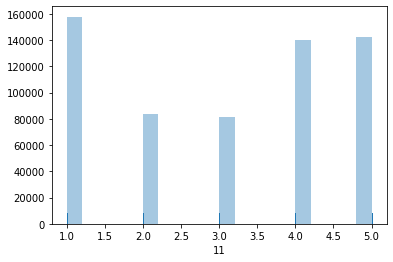

In [0]:
sns.distplot(df[11], bins=20, kde=False, rug=True)
plt.show()

In [0]:
x = df.iloc[:,:-1]
y = df.iloc[:,10:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [0]:
print ( x_train, x_test, y_train, y_test )

           1        2       3          4   ...        7        8        9         10
40145 -0.5271  13.9880  3.9168  19.425000  ... -0.333330  1.03770  0.51974  1.323595
6370   3.8640   6.0422  6.8837   0.078626  ...  0.035197  0.10317  1.73030 -1.187942
2066   3.0897   3.1248  8.9653   0.123110  ...  0.147000 -0.25000  1.56360 -1.120863
25149  1.8781   9.1614  3.4713   0.229490  ...  0.202900  0.63690  1.31360  0.020138
35316  2.5164   9.4602  2.2413  -1.346600  ...  0.223600  0.91865  0.51754  1.131429
...       ...      ...     ...        ...  ...       ...      ...      ...       ...
52031  2.1171   9.0379  3.2738  -0.231410  ...  0.339540  0.88294  0.67544  1.764259
31394  4.7219   9.3733  4.7191  46.725000  ... -0.569360  0.78373  1.30040  0.423138
14703  3.9217   2.7321  9.0325   0.255490  ... -0.175980 -0.16865  1.80480 -0.646610
6356  -4.9675  -3.2298  8.0690   0.275880  ... -0.612840  0.56746  1.06140 -1.182552
1831   2.2136   9.2953  3.2899   0.636880  ...  0.414080  0.80357

In [0]:
from sklearn import metrics
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_predicted = linreg.predict(x_test)

print ('LinearRegression Mean Absolute Error ...', metrics.mean_absolute_error(y_test, linreg_predicted))
print ('LinearRegression Mean Squared Error ... ', metrics.mean_squared_error(y_test, linreg_predicted))
print ('LinearRegression Root Mean Squared Error ...', np.sqrt(metrics.mean_squared_error(y_test, linreg_predicted)))
print ("LinearRegression Score ... ", linreg.score(x_test, y_test))

LinearRegression Mean Absolute Error ... 1.1544945324683602
LinearRegression Mean Squared Error ...  1.96055795740219
LinearRegression Root Mean Squared Error ... 1.4001992563211103
LinearRegression Score ...  0.16497636848980812


In [0]:
print("getting really bad stats so will try to move to a neural network for now and then switch back to statistical learning when I have  time")

getting really bad stats so will try to move to a neural network for now and then switch back to statistical learning when I have  time


In [0]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
logreg_predicted = linreg.predict(x_test)
print('LinearRegression Mean Absolute Error:', metrics.mean_absolute_error(y_test, logreg_predicted))
print('LinearRegression Mean Squared Error:', metrics.mean_squared_error(y_test, logreg_predicted))
print('LinearRegression Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, logreg_predicted)))
print("LinearRegression Score ... ", linreg.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression Mean Absolute Error: 1.2446077977038408
LinearRegression Mean Squared Error: 2.7475419842468316
LinearRegression Root Mean Squared Error: 1.6575711098613028
LinearRegression Score ...  -0.16812808950470082


In [7]:
param_grid = {'alpha': np.logspace(-3, -1, 25), 'l1_ratio':[0.00001, 0.0001, .001, .01, .1, .9, .98, 1]}
grid = GridSearchCV(ElasticNet(normalize=True), param_grid, cv=10)
grid.fit(x_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.00
Best parameters:  {'alpha': 0.001, 'l1_ratio': 1e-05}


In [12]:
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]
parameters = {'criterion': ['gini', 'entropy'], 'max_depth':[4,6,8,12]}
#parameters = dict(decisiontree__criterion=criterion, decisiontree__max_depth=max_depth)
gs_df = GridSearchCV(DecisionTreeClassifier, parameters)
gs_df_fit = gs_df.fit(x_train, y_train)


TypeError: ignored

In [0]:
tree = DecisionTreeClassifier()
fit = tree.fit(x_train, y_train)
decisiontree_pred = tree.predict(x_test)
print("Decision Tree Plain Accuracy:",metrics.accuracy_score(y_test, decisiontree_pred))
print("Decision Tree Score ... ", tree.score(x_test, y_test))

Decision Tree Plain Accuracy: 0.9960791008364952
Decision Tree Score ...  0.9960791008364952


In [0]:
regr_rf = RandomForestRegressor(n_estimators=50, max_depth=100, random_state=2)
regr_rf.fit(x_train, y_train)
y_rf = regr_rf.predict(x_test)
print("RandomForestRegressor Score ... ", regr_rf.score(x_test, y_test))
print("RandomForestRegressor Accuracy:",metrics.accuracy_score(y_test, y_rf.round()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor Score ...  0.9940650018144258
RandomForestRegressor Accuracy: 0.9923123943367237
